### 2021Census_G07_NSW_SED

In [6]:
import pandas as pd

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [40]:
class Table:
    def __init__(self, code, path, path2=None, level1, aggregates):
        self.code: string  = code
        self.path: string = path
        self.level1: list[string] = level1
        self.aggregates: list[string] = aggregates
        if path2 is not None:
            self.df = pd.merge(pd.read_csv(path), pd.read_csv(path2), on='SED_CODE_2021')
        else:
            self.df: Dataframe = pd.read_csv(path)
    
    def summary_stats(self):
        # level 1 
        for col in self.level1:
            self.df[f"{col}_by_{self.aggregates[0]}"] = self.df[col]/self.df[self.aggregates[0]] * 100
        return self.df

    def correlation(self, table):
        merged_df = pd.DataFrame
        merged_df = pd.merge(self.summary_stats(), table.summary_stats(), on='SED_CODE_2021')[self.level1 + table.level1]
        correlation_matrix = merged_df.corr()
        return correlation_matrix

In [41]:
g07_level1 = ['Tot_Indigenous_P', 'Tot_Non_Indigenous_P']
g07_aggregates = ['Tot_Tot_P']
g07 = Table("../data/2021 Census GCP State Electroral Division for NSW/2021Census_G07_NSW_SED.csv", g07_level1, g07_aggregates)

g14_level1 = ['Buddhism_P', 'Christianity_Tot_M', 'Hinduism_M', 'Islam_M', 'Judaism_M']
g14_aggregates = ['Tot_P']
g14 = Table("../data/2021 Census GCP State Electroral Division for NSW/2021Census_G14_NSW_SED.csv", g14_level1, g14_aggregates)

In [46]:
import numpy as np

corr = g07.correlation(g14)
off_diagonal = corr[~np.eye(corr.shape[0], dtype=bool)]
table_corr = np.mean(np.abs(off_diagonal))
table_corr

0.3680777341703198

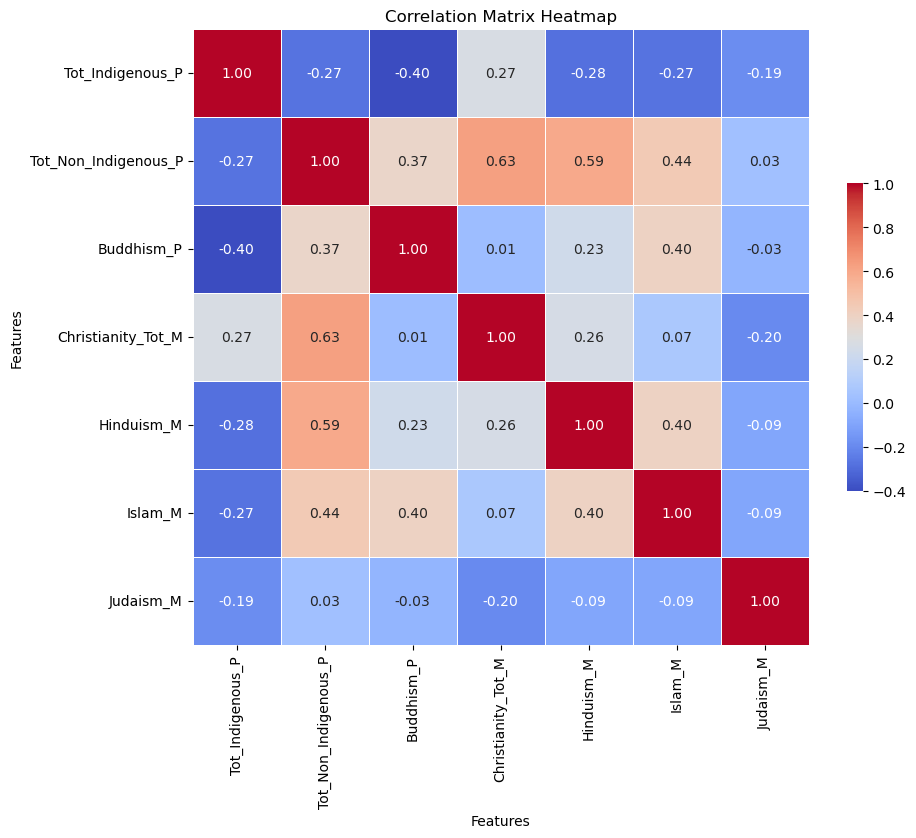

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adding titles and labels
plt.title('Correlation Matrix Heatmap')
plt.ylabel('Features')
plt.xlabel('Features')

# Show plot
plt.show()